In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
#the data is useless... it's unique in each costumer, so i drop it
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [4]:
#no missing value
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# info function, check datatypes, 
# to make it easy to predict, need to change it to numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
# Label encoder

data_types_dict = dict(data.dtypes)
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [7]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [8]:
#for the train and test data, dataset will be split to 80 : 20
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [9]:
# Starting using Sequential Object  
model = tf.keras.models.Sequential()
# add in input and dismensian based on the dataset
model.add(tf.keras.Input(shape=(10,)))
# neuron 1st layer
model.add(tf.keras.layers.Dense(32))
# neuron 2nd layer 
model.add(tf.keras.layers.Dense(32))
# using sigmoid for binary
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [10]:
#adam is the best
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [11]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 1500.6298 - accuracy: 0.6280 - val_loss: 113.1674 - val_accuracy: 0.3495
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 264.4624 - accuracy: 0.6500 - val_loss: 366.2513 - val_accuracy: 0.7100
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 255.3069 - accuracy: 0.6637 - val_loss: 195.0376 - val_accuracy: 0.6935
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 298.0300 - accuracy: 0.6716 - val_loss: 367.7547 - val_accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 299.1747 - accuracy: 0.6733 - val_loss: 396.1274 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 277.0144 - accuracy: 0.6639 - val_loss: 149.9109 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 216.5818 - accuracy: 0.6739 - val_loss: 155.2565 

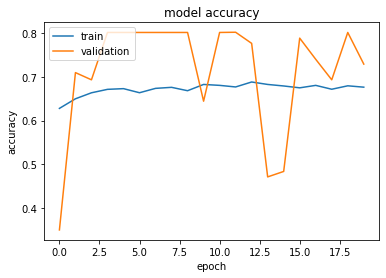

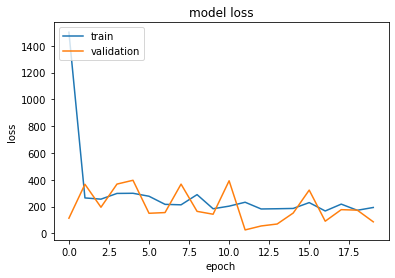

In [12]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#a lot of fluctuations in Accuracy Graph that concludes model learning is unstable 

In [13]:
predictions = np.round(model.predict(Xtest))

In [14]:
# Check Accuracy

from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # good accuracy

0.7295

In [15]:
confusion_matrix(Ytest , predictions) 
# the prection of 'yes' churn customer is big so there is a need to improve the prediction model performance

array([[1422,  182],
       [ 359,   37]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))
#looking at the result below, we knew that a lot of the data is predictic to 0, it's imbalanced

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1604
           1       0.17      0.09      0.12       396

    accuracy                           0.73      2000
   macro avg       0.48      0.49      0.48      2000
weighted avg       0.67      0.73      0.70      2000



In [18]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)